# Prática 01: Ruído em comunicações analógicas

## 1.1  **Gere amostras de ruído AWGN e disserte sobre os seguintes gráficos:**
    
    Autocovariância normalizada;
    Espectro.

### 1.1.1 Matlab - Autocovariância normalizada

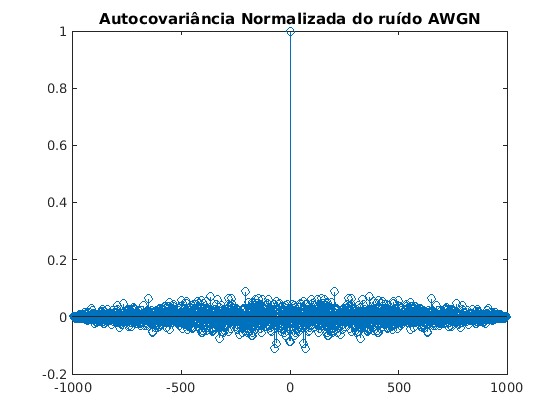

In [8]:
sigma = 1;    % Desvio padrão
N = 1000;     % Número de elementos

% Gerando ruído gaussiano
x = sigma*randn(N,1);

% Realizando o cálculo da autocovariância normalizada
[cov_ww,lags] = xcov(x,x,'coeff');

% Plot
stem(lags,cov_ww)
title('Autocovariância Normalizada do ruído AWGN')

### 1.1.2 Python - Autocovariância

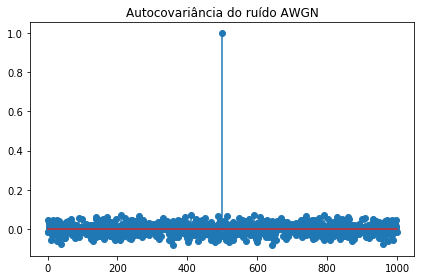

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

sigma = 1;    # Desvio padrão
N = 1000;     # Número de elementos

# Gerando o ruído
x = np.random.normal(0,sigma,N)

# Função da autocovariância normalizada
def xcov(x,y):
    acv = np.correlate(x-np.average(x),y-np.average(y), 'same')
    return acv/max(acv)

# Plot
plt.stem(xcov(x,x))
plt.title('Autocovariância do ruído AWGN')
plt.tight_layout()
plt.show()

### 1.1.3 Matlab - Espectro

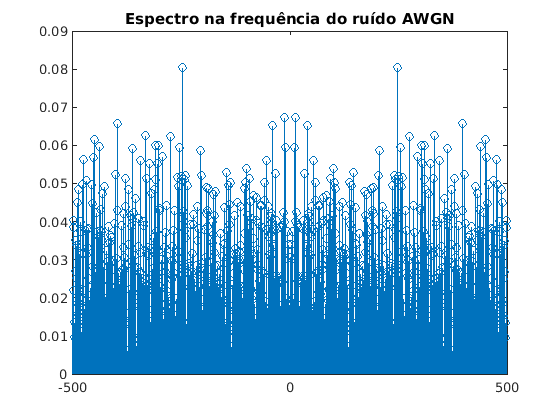

In [7]:
sigma = 1;  % Desvio padrão
N = 1000;     % Número de elementos

% Gerando ruído gaussiano
x = sigma*randn(N,1);

lfft=length(x);                              % Comprimento da fft
x=fftshift(fft(x,lfft)/lfft);                % Sinal x(t) na frequência. 

Fs=1e3 ;
freq = [-Fs/2 : Fs/lfft : Fs/2 - Fs/lfft];

stem(freq,abs(x))
title('Espectro na frequência do ruído AWGN')

### 1.1.4 Python - Espectro

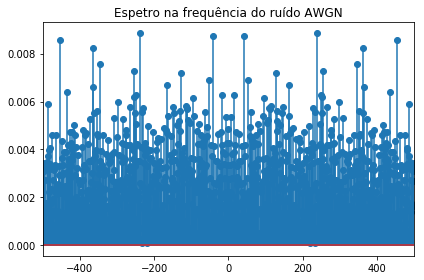

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft, fftshift

%matplotlib inline

sigma = 1;    # Desvio padrão
N = 1000;     # Número de elementos

x = np.random.normal(0,sigma,N)

lfft=len(x)                  # Comprimento da fft
x=fftshift(fft(x,lfft)/lfft) # Sinal x(t) na frequência. 
Fs=1e3 
freq = np.arange(-Fs/2,Fs/2,Fs/lfft)
               
plt.stem(freq, abs(x))
plt.title('Espetro na frequência do ruído AWGN')
plt.xlim([-500,500])
plt.tight_layout()
plt.show()

### 1.1.5 Comentários

O ruído AWGN gerado e analisado foi feito com desvio padrão igual a 1 e, por ser gaussiana, com média 0.

Os gráficos da autocovariância normalizada mostram que as amostras do ruído AWGN são descorrelacionadas e independentes. Ou seja, a autocovariância normalizada máxima ocorre em 0, quando não há qualquer atraso entre amostras e se analisa exatamente a mesma amostra; e, em todos os outros valores de atraso, a autocovariância é muito próxima de zero.

Já os gráficos do espectro do ruído AWGN mostram que há componentes espectrais em todas as frequências apresentadas, como é de se esperar de um ruído branco.

### 1.1.6 Reproduzindo o som das amostras geradas

#### 1.1.6.1 Matlab

In [1]:
sigma = 1;          % Desvio padrão
Fs = 44100;         % Frequência de amostragem
t = 0:1/Fs:4-1/Fs;  % Tempo do sinal
N = length(t);      % Número de elementos

% Gerando ruído gaussiano
ruido = sigma*randn(N,1);

% Reproduzindo o som
p = audioplayer(ruido, Fs);
play(p)
pause(3)

#### 1.1.6.2 Python

In [2]:
import numpy as np           
import matplotlib.pyplot as plt 
import scipy.io.wavfile as wv 
import os

sigma = 1;    # Desvio padrão
N = 1000;     # Número de elementos

Fs = 44100
t = np.arange(0,4+1/Fs,1/Fs)
ruido = np.random.normal(0,1,N)

wv.write('./sinalAWGN.wav',Fs,ruido)
os.system('vlc --play-and-exit ./sinalAWGN.wav')

0

#### 1.1.6.3 Comentários
Ao escutar o áudio do ruído AWGN gerado, percebe-se que o som é muito parecido com um "chiado" de TV analógica, isto é, com os sinais interferentes captados por ela.

## 1.2 Estimação da SNR

### 1.2.1 Matlab

In [6]:
close all; clc; clear all;

sinalReal = load('./Pratica_08_sinal_real.mat');
sinalComplexo = load('./Pratica_08_sinal_complexo.mat');

% Variáveis comuns a ambos os sinais
N = length(sinalComplexo.y);
fm = sinalComplexo.fm;
fs = sinalComplexo.fs;

% Variáveis sinal complexo
Ai = sinalComplexo.Ai;
Ar = sinalComplexo.Ar;
sinalComplexo  = sinalComplexo.y;

% Variáveis sinal real
Am = sinalReal.Am;
sinalReal = sinalReal.y;

% Sinais originais
Ts = 1/fs;
t=linspace(0, Ts*(N-1), N);
sinalRealOriginal = Am*cos(2*pi*fm*t);
sinalComplexoOriginal = Ar*cos(2*pi*fm*t)+1j*Ai*cos(2*pi*fm*t);

% Ruídos (ruido = sinal - sinaloriginal)
ruidoSinalReal = sinalReal - sinalRealOriginal;
ruidoSinalComplexo = sinalComplexo - sinalComplexoOriginal;

% Estimação da SNR pelas amostras do sinal recebido
pSinalReal = sum(abs(sinalRealOriginal.^2))/N;
pRuidoSinalReal = sum(abs(ruidoSinalReal.^2))/N;
SNR_sinalReal = 10*log10(pSinalReal/pRuidoSinalReal);

pSinalComplexo = sum(abs(sinalComplexoOriginal.^2))/N;
pRuidoSinalComplexo = sum(abs(ruidoSinalComplexo.^2))/N;
SNR_sinalComplexo = 10*log10(pSinalComplexo/pRuidoSinalComplexo);


% Mostrar informações
disp('Estimação de SNR: ')
disp(['   SNR Sinal Real: ' num2str(SNR_sinalReal) ' dB']);
disp(['   SNR Sinal Complexo: ' num2str(SNR_sinalComplexo) ' dB']);

Estimação de SNR: 
   SNR Sinal Real: 15.0435 dB
   SNR Sinal Complexo: 10.0384 dB


### 1.2.2 Python

In [3]:
import numpy as np
from scipy.io import loadmat

sinalReal = loadmat('./Pratica_08_sinal_real.mat')
sinalComplexo = loadmat('./Pratica_08_sinal_complexo.mat')

# Variáveis comuns a ambos os sinais
N = len(sinalComplexo['y'].flatten())
fm = float(sinalComplexo['fm'])
fs = float(sinalComplexo['fs'])

# Variáveis sinal complexo
Ai = float(sinalComplexo['Ai'])
Ar = float(sinalComplexo['Ar'])
sinalComplexo  = sinalComplexo['y'].flatten()

# Variáveis sinal real
Am = float(sinalReal['Am'])
sinalReal = sinalReal['y']

# Sinais originais
Ts = 1/fs;
t=np.arange(0, N*Ts, Ts);
sinalRealOriginal = Am*np.cos(2*np.pi*fm*t);
sinalComplexoOriginal = Ar*np.cos(2*np.pi*fm*t)+1j*Ai*np.cos(2*np.pi*fm*t);

# Ruídos (ruido = sinal - sinaloriginal)
ruidoSinalReal = sinalReal - sinalRealOriginal;
ruidoSinalComplexo = sinalComplexo - sinalComplexoOriginal;

# Estimação da SNR pelas amostras do sinal recebido
pSinalReal = (np.linalg.norm(sinalRealOriginal)**2)/N
pRuidoSinalReal = (np.linalg.norm(ruidoSinalReal)**2)/N
SNR_sinalReal = 10*np.log10(pSinalReal/pRuidoSinalReal)

pSinalComplexo = (np.linalg.norm(sinalComplexoOriginal)**2)/N
pRuidoSinalComplexo = (np.linalg.norm(ruidoSinalComplexo)**2)/N
SNR_sinalComplexo = 10*np.log10(pSinalComplexo/pRuidoSinalComplexo)

# Mostrar informações
print('Estimação de SNR: ')
print(['   SNR Sinal Real: '+ str(SNR_sinalReal) +' dB']);
print(['   SNR Sinal Complexo: ' +str(SNR_sinalComplexo) +' dB']);


Estimação de SNR: 
['   SNR Sinal Real: 15.0434766237 dB']
['   SNR Sinal Complexo: 10.0383801478 dB']


# Prática 02: Ruídos em comunicações digitais

Use a função pskmod.m do Matlab e gerar amostras para as seguintes combinações de moduladores e valores de Eb/N0:    

    a) Eb/N0 = 0, 5, 20 dB; modulação BPSK;
    b) Eb/N0 = 0, 5, 20 dB; modulação 8-PSK.

## 2.1 Eb/N0 = 0, 5, 20 dB, modulação BPSK

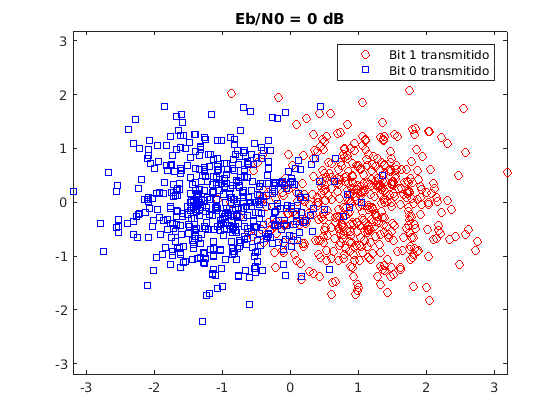

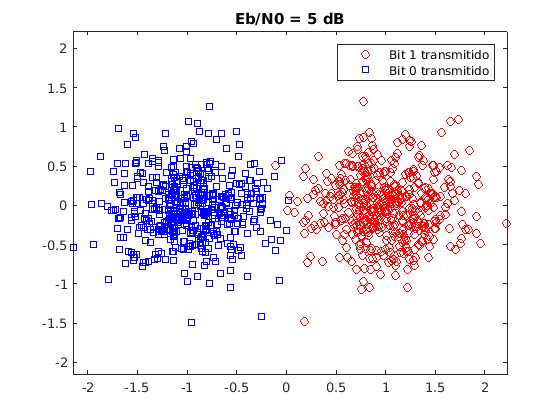

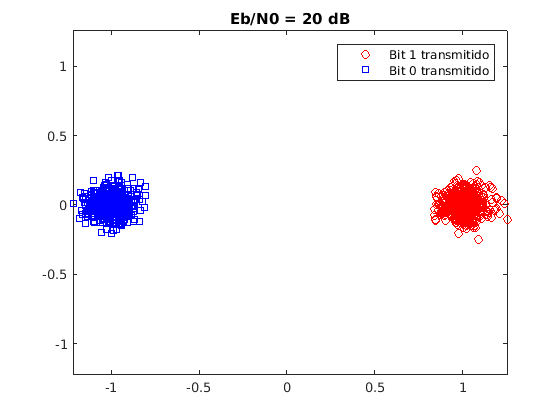

In [1]:
% Parâmetros
EbN0_dB = [20 5 0];     % Eb/N0 de entrada
Ns = 10^3;              % Número de símbolos simulados
M = 2;                  % Número de símbolo da modulação BPSK

for i = 1:length(EbN0_dB)
    bits2 = randi([0 M-1],Ns,1);
    txSig = pskmod(bits2,M);
    rxSig = awgn(txSig,EbN0_dB(i));
    
    % Gráficos
    figure(i);
    plot(rxSig(find(real(txSig)>0)),'ro');
    hold on;
    plot(rxSig(find(real(txSig)<=0)),'bs')
    title(['Eb/N0 = ' num2str(EbN0_dB(i)) ' dB']);
    legend('Bit 1 transmitido','Bit 0 transmitido');
    minAx = min([real(rxSig)' imag(rxSig)']);
    maxAx = max([real(rxSig)' imag(rxSig)']);
    axis([minAx maxAx minAx maxAx]);


end

## 2.2 Eb/N0 = 0, 5, 20 dB, modulação 8-PSK

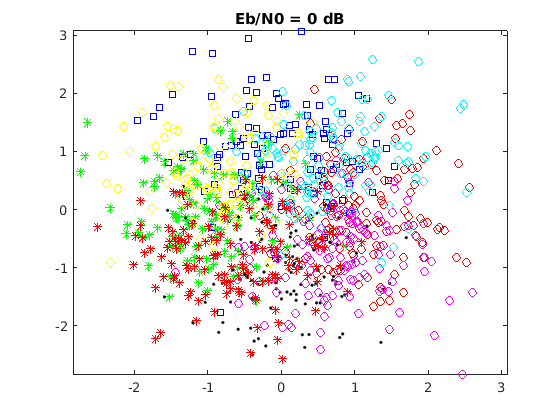

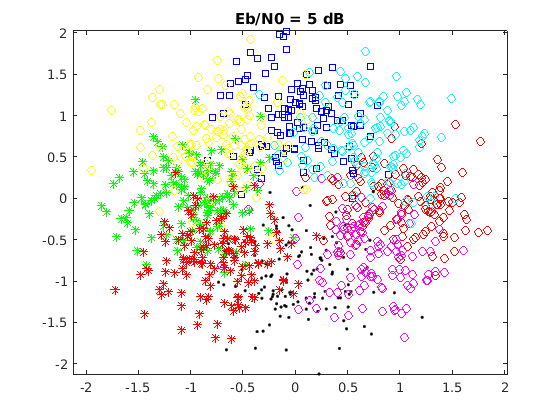

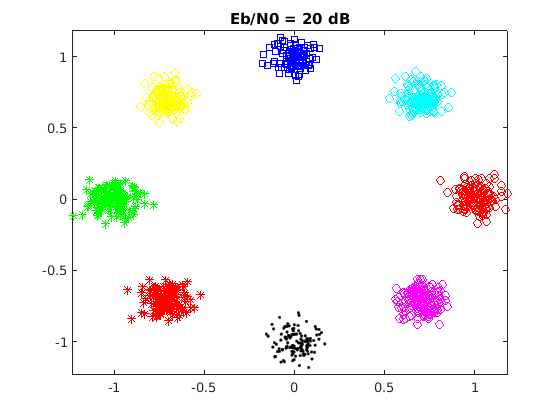

In [12]:
clear;clc;
% Parâmetros
EbN0_dB = [20 5 0];     % Eb/N0 de entrada
Ns = 10^3;              % Número de símbolos simulados
M = 8;                  % Número de símbolo da modulação BPSK

for i = 1:length(EbN0_dB)
    bits8 = randi([0 M-1],Ns,1);
    txSig = pskmod(bits8,M);
    rxSig = awgn(txSig,EbN0_dB(i));
    
    u = unique(txSig); 
    
    % Gráficos
    figure(i);
    plot(rxSig(find(txSig==u(1))),'ro')
    hold on;
    plot(rxSig(find(txSig==u(2))),'bs')
    hold on;
    plot(rxSig(find(txSig==u(3))),'g*')
    hold on;
    plot(rxSig(find(txSig==u(4))),'k.')
    hold on;
    plot(rxSig(find(txSig==u(5))),'mo')
    hold on;
    plot(rxSig(find(txSig==u(6))),'co')
    hold on;
    plot(rxSig(find(txSig==u(7))),'yo')
    hold on;
    plot(rxSig(find(txSig==u(8))),'r*')
    hold on;
    title(['Eb/N0 = ' num2str(EbN0_dB(i)) ' dB']);
    %legend('Bit 1 transmitido','Bit 0 transmitido');
    minAx = min([real(rxSig)' imag(rxSig)']);
    maxAx = max([real(rxSig)' imag(rxSig)']);
    axis([minAx maxAx minAx maxAx]);


end

## 2.3 Comentários
Disserte sobre os diagramas de constelação. O que pode ser dito sobre a diferenciação dos bits nas diversas configurações? O que pode ser dito ao comparar BPSK e 8-PSK com Eb/N0 = 5 dB?

Na modulação BPSK, um símbolo é formado por um bits, de modo que o bit 0 seja representado por -1 e o bit 1 por 1, por exemplo. Já na modulação 8-PSK, um conjunto de 3 bits forma um símbolo, de forma que 8 símbolos possíveis.

Para uma Eb/N0 = 5 dB, percebe-se pelos gráficos acima que, na modulação BPSK, há uma menor taxa de erro de bit (BER) em comparação com o 8-PSK. Isso ocorre pelo fato de que os símbolos no 8-PSK são mais próximos, sendo necessário um ruído menor para um símbolo entrar na região de outro e ser erroneamente interpretado na recepção, gerando o erro de bit.